In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData3.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps
0,0,SAC,UTA,11.0,40.0,0.216,29.0,22.0,0.569,2009-02-06,-4,-2,Pinnacle Sports,-3,Sportsbetting,-2.875,8
1,1,POR,UTA,29.0,17.0,0.630,26.0,22.0,0.542,2009-01-31,14,9,5Dimes,9,5Dimes,9.000,8
2,2,MEM,UTA,11.0,28.0,0.282,24.0,16.0,0.600,2009-01-16,-10,-4,5Dimes,-4,5Dimes,-4.000,8
3,3,UTA,IND,23.0,15.0,0.605,13.0,25.0,0.342,2009-01-12,7,10,Bovada,9,Sportsbetting,9.250,8
4,4,HOU,UTA,20.0,11.0,0.645,18.0,14.0,0.563,2008-12-27,5,9,5Dimes,9,5Dimes,9.000,8


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'TopLine', 'TLCompany', 'BotLine',
       'BLCompany', 'Average', 'NumComps'],
      dtype='object')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index','Date'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps,Year,Month,Week,Weekday
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,9,5,Pinnacle Sports,4,Bookmaker,4.75,4,2006,11,44,2
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,10,7,Bookmaker,7,Bookmaker,7.00,4,2006,11,44,2
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,-1,5,Bovada,4,5Dimes,4.75,4,2006,11,44,2
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,15,-1,Bookmaker,-2,Bovada,-1.25,4,2006,11,44,2
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,3,6,Bovada,6,Bovada,6.00,4,2006,11,44,2


In [4]:
df['average'] = df['Average']
df = df.drop(['Average'], axis=1)
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]
team = df.HomeTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df1 = df.copy(deep=True)
df1 = df1.replace({'HomeTeam': team_dict})
df1 = df1.replace({'AwayTeam': team_dict})
better = df1.TLCompany.unique()
bet_dict = dict(zip(better, range(len(better))))
df1 = df1.replace({'TLCompany': bet_dict})
df1 = df1.replace({'BLCompany': bet_dict})
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,0,27,1.0,0.0,1.0,0.0,1.0,0.0,5,0,4,1,4,2006,11,44,2,4.75,9
1,1,14,1.0,0.0,1.0,0.0,1.0,0.0,7,1,7,1,4,2006,11,44,2,7.00,10
2,2,23,0.0,1.0,0.0,1.0,0.0,1.0,5,2,4,3,4,2006,11,44,2,4.75,-1
3,3,17,1.0,0.0,1.0,1.0,1.0,0.5,-1,1,-2,2,4,2006,11,44,2,-1.25,15
4,4,21,1.0,0.0,1.0,0.0,1.0,0.0,6,2,6,2,4,2006,11,44,2,6.00,3


In [5]:
df2 = df1.copy(deep=True)
df2.loc[df2['WinMargin'] < 0, 'HTLoss'] = df2['HTLoss']-1
df2.loc[df2['WinMargin'] >= 0, 'HTWin'] = df2['HTWin']-1
df2.loc[df2['WinMargin'] < 0, 'ATWin'] = df2['ATWin']-1
df2.loc[df2['WinMargin'] >= 0, 'ATLoss'] = df2['ATLoss']-1
df2['HT%'] = df2['HTWin']/(df2['HTWin'] + df2['HTLoss'])
df2['AT%'] = df2['ATWin']/(df2['ATWin'] + df2['ATLoss'])
df2 = df2.fillna(0)
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,0,27,0.0,0.0,0.0,0.0,0.0,0.0,5,0,4,1,4,2006,11,44,2,4.75,9
1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,7,1,7,1,4,2006,11,44,2,7.00,10
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,5,2,4,3,4,2006,11,44,2,4.75,-1
3,3,17,0.0,0.0,0.0,1.0,0.0,1.0,-1,1,-2,2,4,2006,11,44,2,-1.25,15
4,4,21,0.0,0.0,0.0,0.0,0.0,0.0,6,2,6,2,4,2006,11,44,2,6.00,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
df2.head()

In [6]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

def linregger(frame, size):
    train=frame[0:(round(len(frame)*.8))] 
    test=frame[(round(len(frame)*.8)):]
    trains = np.split(train, [size], axis=1)
    train_x=trains[0]
    train_y=trains[1]
    tests = np.split(test, [size], axis=1)
    test_x=tests[0]
    test_y=tests[1]
    #reg = LinearRegression().fit(train_x.values, train_y.values)
    #reg = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.6).fit(train_x.values, train_y.values)
    K.clear_session()
    model = Sequential()
    model.add(Dense(64, input_dim=size, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x.values, train_y.WinMargin.values.ravel(), validation_data=[test_x.values, test_y['WinMargin'].values.ravel()], epochs=100,verbose=0,shuffle=False)
    train_y2 = train_y.copy(deep=True)
    test_y2 = test_y.copy(deep=True)
    train_y2['prediction'] = model.predict(train_x.values)
    test_y2['prediction'] = model.predict(test_x.values)
    train_y3 = train_y2.copy(deep=True)
    test_y3 = test_y2.copy(deep=True)
    train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
    train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
    train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
    train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
    test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
    test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
    test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
    test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
    trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
    #print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
    testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
    #print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')
    return [trainaccuracy,testaccuracy,len(test)]

# Time Analysis

## By Month

In [11]:
monthdata = []
month = df2.Month.unique()
for m in month:
    df3 = df2.copy(deep=True)
    df3 = df3[df3['Month'] == m]
    if (len(df3) > 2):
        accs = linregger(df3, 18)
        monthdata.append(m)
        monthdata.append(accs[0])
        monthdata.append(accs[1])

In [12]:
mdata = np.array(monthdata)
mdata2 = np.reshape(mdata, (-1, 3))
betline2 = pd.DataFrame(mdata2, columns=['Month', 'TrainAccuracy', 'TestAccuracy'])
betline2 = betline2.sort_values(by=['Month'])
betline2['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Nov', 'Dec']

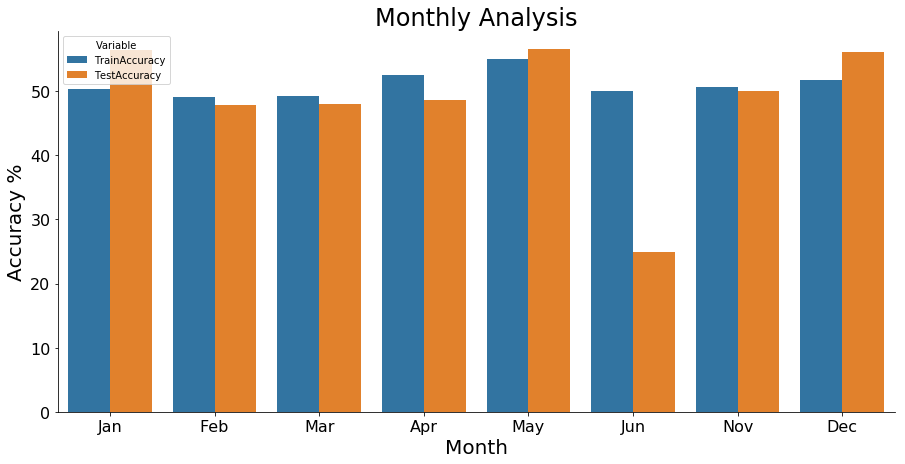

In [13]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(15, 7))
tidy = betline2.melt(id_vars='Month').rename(columns=str.title)
ax = sns.barplot(x='Month', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set_title("Monthly Analysis", fontsize=24)
ax.set_xlabel("Month",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
ax.tick_params(labelsize=16)
#for index, row in tidy.iterrows():
#    ax.text(row.name, row.Value, round(row.Value,2), color='black', ha="center")
sns.despine(fig)

In [14]:
betline2.sort_values(by=['TestAccuracy'],ascending=False).head()

,Month,TrainAccuracy,TestAccuracy
6,May,55.072464,56.521739
2,Jan,50.389185,56.457565
1,Dec,51.748561,56.175299
0,Nov,50.625869,50.000000
5,Apr,52.564103,48.691099


## By Weekday

In [18]:
weekdata = []
week = df2.Weekday.unique()
for w in week:
    df3 = df2.copy(deep=True)
    df3 = df3[df3['Weekday'] == w]
    if (len(df3) > 2):
        accs = linregger(df3, 18)
        weekdata.append(w)
        weekdata.append(accs[0])
        weekdata.append(accs[1])

In [19]:
wdata = np.array(weekdata)
wdata2 = np.reshape(wdata, (-1, 3))
betline2 = pd.DataFrame(wdata2, columns=['Weekday', 'TrainAccuracy', 'TestAccuracy'])
betline2 = betline2.sort_values(by=['Weekday'])
betline2['Weekday'] = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']

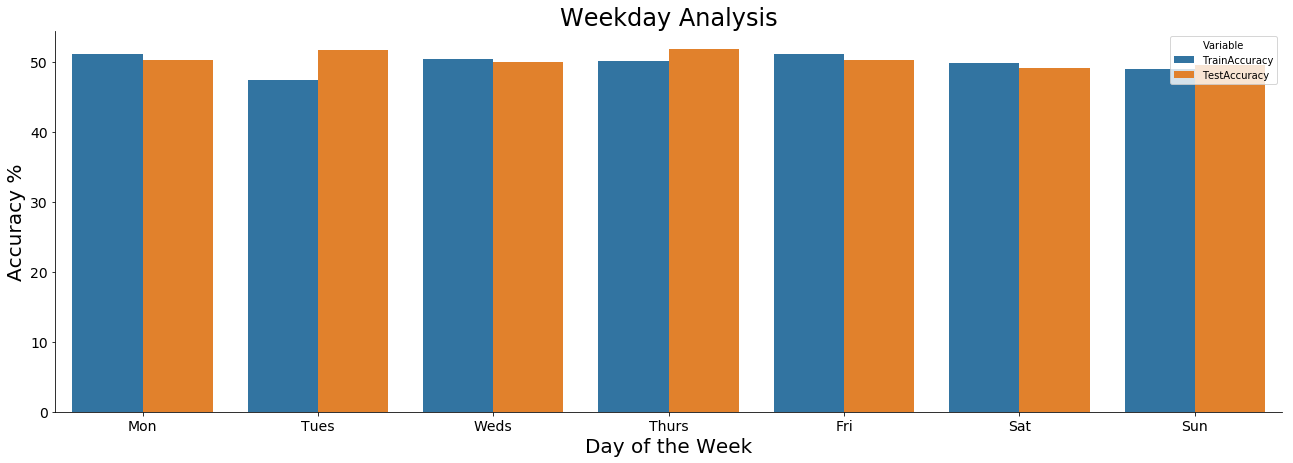

In [20]:
fig, ax1 = plt.subplots(figsize=(22, 7))
tidy = betline2.melt(id_vars='Weekday').rename(columns=str.title)
ax = sns.barplot(x='Weekday', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set_title("Weekday Analysis", fontsize=24)
ax.set_xlabel("Day of the Week",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
ax.tick_params(labelsize=14)
#for index, row in tidy.iterrows():
#    ax.text(row.name, row.Value, round(row.Value,2), color='black', ha="center")
sns.despine(fig)

In [21]:
betline2.sort_values(by=['TestAccuracy'],ascending=False).head()

,Weekday,TrainAccuracy,TestAccuracy
1,Thurs,50.125628,51.758794
6,Tues,47.403462,51.733333
5,Mon,51.088348,50.256410
2,Fri,51.092657,50.174825
0,Weds,50.344548,49.918963


# Team Analysis

## Home Team

In [22]:
teamdata = []
team2 = df2.HomeTeam.unique()
for t in team2:
    df3 = df2.copy(deep=True)
    df3 = df3[df3['HomeTeam'] == t]
    df3 = df3.drop(['TLCompany','BLCompany','NumComps'], axis=1)
    if (len(df3) > 2):
        accs = linregger(df3, 15)
        teamdata.append(t)
        teamdata.append(accs[0])
        teamdata.append(accs[1])
        teamdata.append(accs[2])

In [23]:
tdata = np.array(teamdata)
tdata2 = np.reshape(tdata, (-1, 4))
betline2 = pd.DataFrame(tdata2, columns=['Team', 'TrainAccuracy', 'TestAccuracy', 'TestSize'])
betline2['Team'] = team

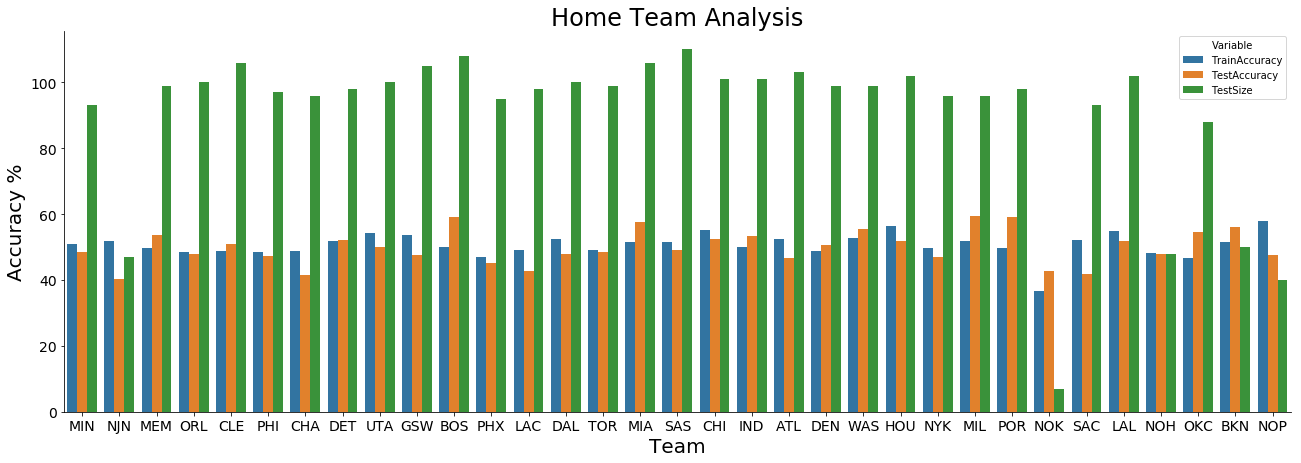

In [24]:
fig, ax1 = plt.subplots(figsize=(22, 7))
tidy = betline2.melt(id_vars='Team').rename(columns=str.title)
ax = sns.barplot(x='Team', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set_title("Home Team Analysis", fontsize=24)
ax.set_xlabel("Team",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
ax.tick_params(labelsize=14)
#for index, row in tidy.iterrows():
#    ax.text(row.name, row.Value, round(row.Value,2), color='black', ha="center")
sns.despine(fig)

In [25]:
print('The best home teams to bet on are:')
betline2.sort_values(by=['TestAccuracy'],ascending=False).head()

The best home teams to bet on are:


,Team,TrainAccuracy,TestAccuracy,TestSize
24,MIL,51.697128,59.375000,96.0
10,BOS,50.000000,59.259259,108.0
25,POR,49.616368,59.183673,98.0
15,MIA,51.529412,57.547170,106.0
31,BKN,51.500000,56.000000,50.0


In [26]:
betline2['Type'] = 'Home'
table1 = betline2

## Away Team

In [27]:
teamdata = []
team2 = df2.AwayTeam.unique()
for t in team2:
    df3 = df2.copy(deep=True)
    df3 = df3[df3['AwayTeam'] == t]
    df3 = df3.drop(['TLCompany','BLCompany','NumComps'], axis=1)
    if (len(df3) > 2):
        accs = linregger(df3, 15)
        teamdata.append(t)
        teamdata.append(accs[0])
        teamdata.append(accs[1])
        teamdata.append(accs[2])

In [28]:
tdata = np.array(teamdata)
tdata2 = np.reshape(tdata, (-1, 4))
betline2 = pd.DataFrame(tdata2, columns=['Team', 'TrainAccuracy', 'TestAccuracy', 'TestSize'])
betline2 = betline2.sort_values(by=['Team'])
betline2['Team'] = team

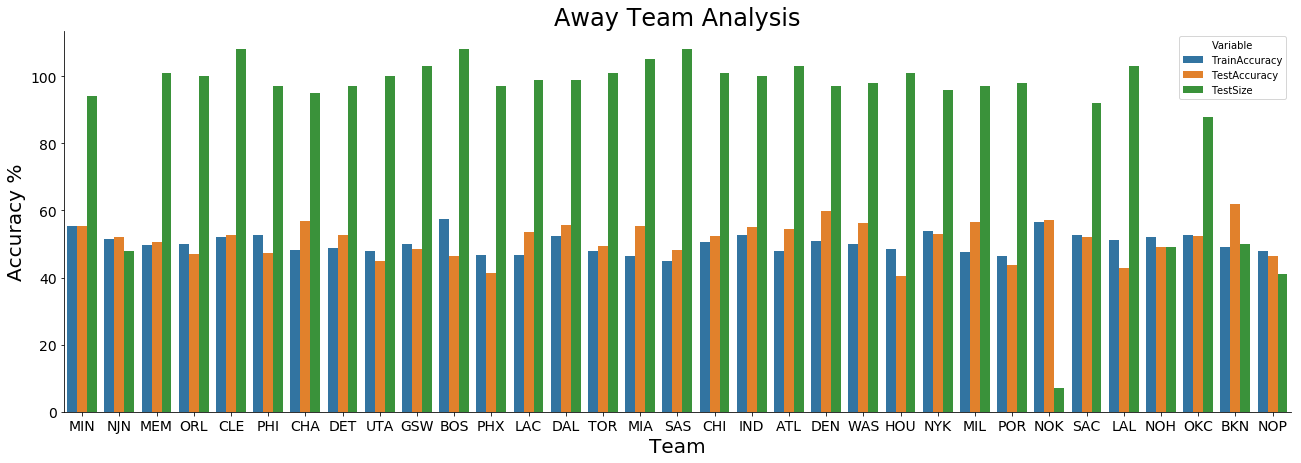

In [29]:
fig, ax1 = plt.subplots(figsize=(22, 7))
tidy = betline2.melt(id_vars='Team').rename(columns=str.title)
ax = sns.barplot(x='Team', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set_title("Away Team Analysis", fontsize=24)
ax.set_xlabel("Team",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
ax.tick_params(labelsize=14)
#for index, row in tidy.iterrows():
#    ax.text(row.name, row.Value, round(row.Value,2), color='black', ha="center")
sns.despine(fig)

In [30]:
betline2.sort_values(by=['TestAccuracy'],ascending=False).tail()

,Team,TrainAccuracy,TestAccuracy,TestSize
17,UTA,47.869674,45.000000,100.0
18,POR,46.291560,43.877551,98.0
9,LAL,51.213592,42.718447,103.0
26,PHX,46.632124,41.237113,97.0
8,HOU,48.395062,40.594059,101.0


In [31]:
betline2['Type'] = 'Away'
table2 = betline2

## Overall Team

In [32]:
teamdata = []
team2 = df2.HomeTeam.unique()
team3 = df2.AwayTeam.unique()
team3.sort()
for t in range(len(team2)):
    df3 = df2.copy(deep=True)
    df3 = df3[(df3['HomeTeam'] == team2[t]) | (df3['AwayTeam'] == team3[t])]
    df3 = df3.drop(['TLCompany','BLCompany','NumComps'], axis=1)
    if (len(df3) > 2):
        accs = linregger(df3, 15)
        teamdata.append(t)
        teamdata.append(accs[0])
        teamdata.append(accs[1])
        teamdata.append(accs[2])

In [33]:
tdata = np.array(teamdata)
tdata2 = np.reshape(tdata, (-1, 4))
betline2 = pd.DataFrame(tdata2, columns=['Team', 'TrainAccuracy', 'TestAccuracy', 'TestSize'])
betline2['Team'] = team

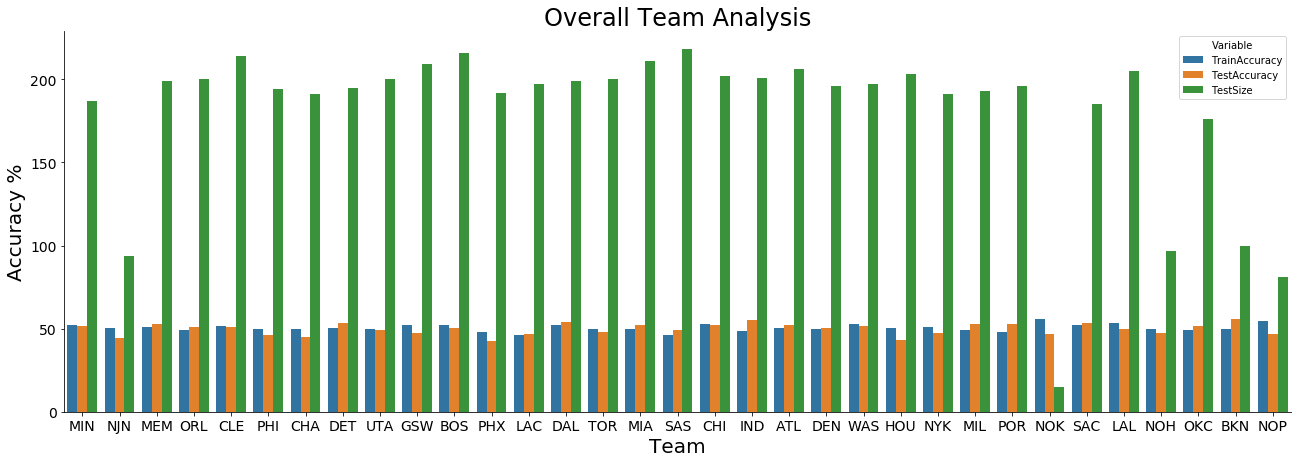

In [34]:
fig, ax1 = plt.subplots(figsize=(22, 7))
tidy = betline2.melt(id_vars='Team').rename(columns=str.title)
ax = sns.barplot(x='Team', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set_title("Overall Team Analysis", fontsize=24)
ax.set_xlabel("Team",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
ax.tick_params(labelsize=14)
#for index, row in tidy.iterrows():
#    ax.text(row.name, row.Value, round(row.Value,2), color='black', ha="center")
sns.despine(fig)

In [35]:
betline2.sort_values(by=['TestAccuracy'],ascending=False).head()

,Team,TrainAccuracy,TestAccuracy,TestSize
31,BKN,49.750000,56.000000,100.0
18,IND,48.816936,55.223881,201.0
13,DAL,51.944793,54.271357,199.0
27,SAC,52.226721,53.513514,185.0
7,DET,50.256410,53.333333,195.0


In [36]:
betline2['Type'] = 'Total'
table3 = betline2

In [37]:
final = table1.append(table2, ignore_index = True)
final = final.append(table3, ignore_index = True)
final = final[final['Team'] != 'NOK']
final.to_csv('80-20Accuracies.csv')

In [39]:
print('The best teams to bet on are: ')
final.sort_values('TestAccuracy', ascending=False).head(10)

The best teams to bet on are: 


,Team,TrainAccuracy,TestAccuracy,TestSize,Type
64,BKN,49.000000,62.000000,50.0,Away
53,DEN,51.025641,59.793814,97.0,Away
24,MIL,51.697128,59.375000,96.0,Home
10,BOS,50.000000,59.259259,108.0,Home
25,POR,49.616368,59.183673,98.0,Home
15,MIA,51.529412,57.547170,106.0,Home
39,CHA,48.293963,56.842105,95.0,Away
57,MIL,47.557841,56.701031,97.0,Away
54,WAS,49.872123,56.122449,98.0,Away
31,BKN,51.500000,56.000000,50.0,Home


# Bettor Analysis

## Top Line

In [40]:
linedata = []
line2 = df2.TLCompany.unique()
for l in line2:
    df3 = df2.copy(deep=True)
    df3 = df3[df3['TLCompany'] == l]
    if (len(df3) > 2):
        accs = linregger(df3, 18)
        linedata.append(l)
        linedata.append(accs[0])
        linedata.append(accs[1])

In [41]:
ldata = np.array(linedata)
ldata2 = np.reshape(ldata, (-1, 3))
betline2 = pd.DataFrame(ldata2, columns=['Company', 'TrainAccuracy', 'TestAccuracy'])
betline2['Company']= better

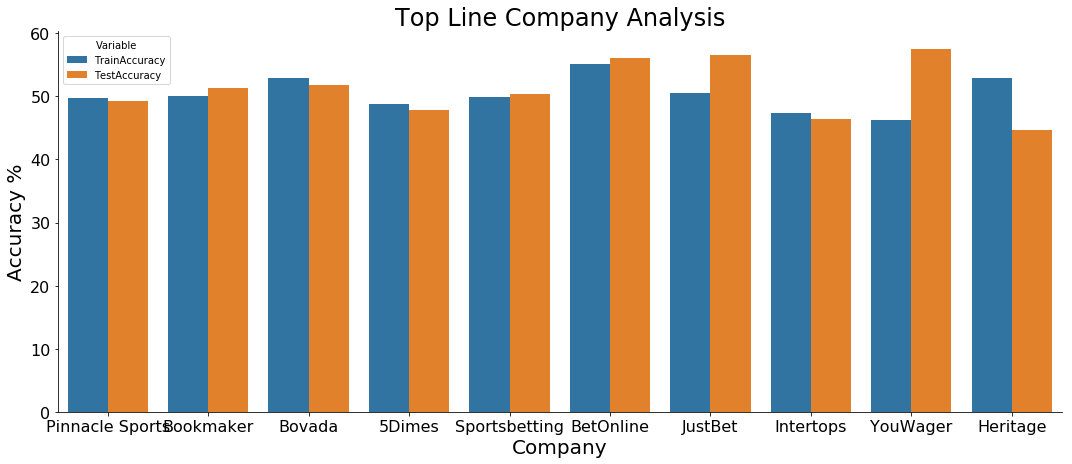

In [42]:
fig, ax1 = plt.subplots(figsize=(18, 7))
tidy = betline2.melt(id_vars='Company').rename(columns=str.title)
ax = sns.barplot(x='Company', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set_title("Top Line Company Analysis", fontsize=24)
ax.set_xlabel("Company",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
ax.tick_params(labelsize=16)
#for index, row in tidy.iterrows():
#    ax.text(row.name, row.Value, round(row.Value,2), color='black', ha="center")
sns.despine(fig)

In [43]:
betline2.sort_values(by=['TestAccuracy'],ascending=False).head()

,Company,TrainAccuracy,TestAccuracy
8,YouWager,46.315789,57.446809
6,JustBet,50.458716,56.544503
5,BetOnline,55.172414,56.097561
2,Bovada,52.911208,51.744186
1,Bookmaker,50.116189,51.393189


## Bottom Line

In [44]:
linedata = []
line2 = df2.BLCompany.unique()
for l in line2:
    df3 = df2.copy(deep=True)
    df3 = df3[df3['BLCompany'] == l]
    if (len(df3) > 2):
        accs = linregger(df3, 18)
        linedata.append(l)
        linedata.append(accs[0])
        linedata.append(accs[1])

In [45]:
ldata = np.array(linedata)
ldata2 = np.reshape(ldata, (-1, 3))
betline2 = pd.DataFrame(ldata2, columns=['Company', 'TrainAccuracy', 'TestAccuracy'])
betline2 = betline2.sort_values(by=['Company'])
betline2['Company']= better

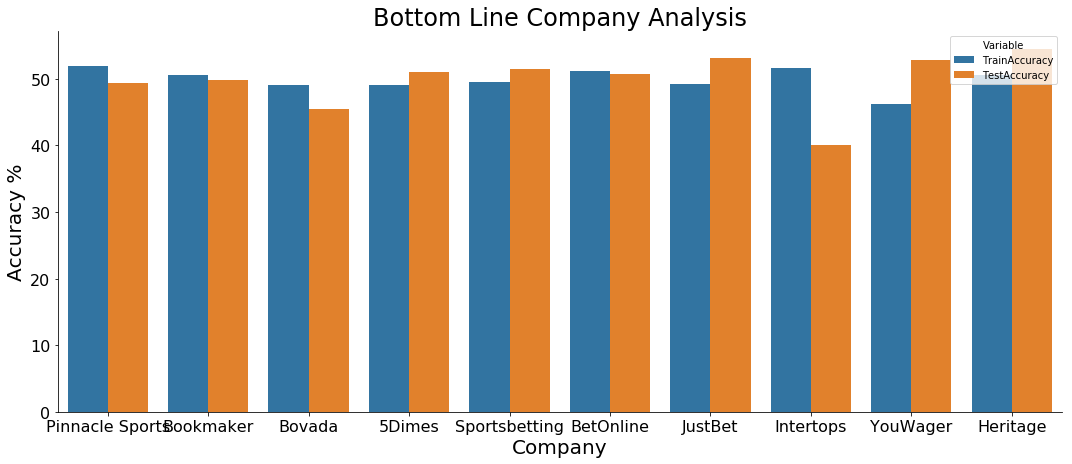

In [46]:
fig, ax1 = plt.subplots(figsize=(18, 7))
tidy = betline2.melt(id_vars='Company').rename(columns=str.title)
ax = sns.barplot(x='Company', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set_title("Bottom Line Company Analysis", fontsize=24)
ax.set_xlabel("Company",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
ax.tick_params(labelsize=16)
#for index, row in tidy.iterrows():
#    ax.text(row.name, row.Value, round(row.Value,2), color='black', ha="center")
sns.despine(fig)

In [47]:
betline2.sort_values(by=['TestAccuracy'],ascending=False).head()

,Company,TrainAccuracy,TestAccuracy
9,Heritage,50.549451,54.411765
4,JustBet,49.222065,53.107345
8,YouWager,46.190476,52.830189
5,Sportsbetting,49.526944,51.480263
1,5Dimes,49.087416,51.055662


## # of Betting Companies

In [48]:
linedata = []
line2 = df2.NumComps.unique()
for l in line2:
    df3 = df2.copy(deep=True)
    df3 = df3[df3['NumComps'] == l]
    if (len(df3) > 100):
        accs = linregger(df3, 18)
        linedata.append(l)
        linedata.append(accs[0])
        linedata.append(accs[1])

In [49]:
ldata = np.array(linedata)
ldata2 = np.reshape(ldata, (-1, 3))
betline2 = pd.DataFrame(ldata2, columns=['Company', 'TrainAccuracy', 'TestAccuracy'])
betline2['Company'] = [4,7,8,9,10]

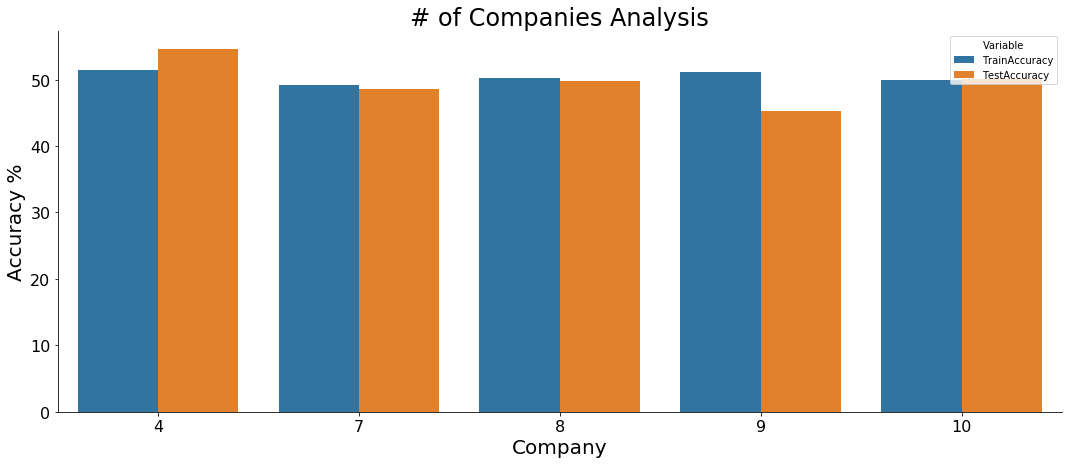

In [50]:
fig, ax1 = plt.subplots(figsize=(18, 7))
tidy = betline2.melt(id_vars='Company').rename(columns=str.title)
ax = sns.barplot(x='Company', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set_title("# of Companies Analysis", fontsize=24)
ax.set_xlabel("Company",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
ax.tick_params(labelsize=16)
#for index, row in tidy.iterrows():
#    ax.text(row.name, row.Value, round(row.Value,2), color='black', ha="center")
sns.despine(fig)

In [51]:
betline2.sort_values(by=['TestAccuracy'],ascending=False).head()

,Company,TrainAccuracy,TestAccuracy
0,4,51.450189,54.545455
4,10,49.881481,50.088915
2,8,50.237192,49.715370
1,7,49.226306,48.648649
3,9,51.147842,45.220588
